<a href="https://colab.research.google.com/github/Yunho-seo/education_center5/blob/main/15_pandas_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9A%94%EC%95%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# 2차원 리스트 -> 계층적 인덱스 (개수는 1:1이 되어야 함)
arrays = [['학교1', '학교1', '학교1', '학교1', '학교2', '학교2', '학교3', '학교3'],
          ['1반', '2반', '1반', '2반', '1반', '2반', '1반', '2반']]
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])
df = pd.DataFrame({'합격': [1, 1, 1, 1, 2, 2, 3, 3],
                   '등수': np.arange(8)},
                  index = arrays)

df

합격  등수
학교1 1반   1   0
    2반   1   1
    1반   1   2
    2반   1   3
학교2 1반   2   4
    2반   2   5
학교3 1반   3   6
    2반   3   7

In [ ]:
grouped = df.groupby(level = 0)  # 0, 1
print(grouped)  # 그룹표시만 하고, 실제 작업은 하지 않음
grouped.sum()   # 집계함수를 적용할 때에 적용된다.

,합격,등수
학교1,4,6
학교2,4,9
학교3,6,13


In [ ]:
df.groupby(level=1).sum()  # level = 1('second')로 합계 구하기

,합격,등수
1반,7,12
2반,7,16


In [ ]:
df.groupby(level=[0, 1]).sum()

합격  등수
학교1 1반   2   2
    2반   2   4
학교2 1반   2   4
    2반   2   5
학교3 1반   3   6
    2반   3   7

In [ ]:
# range(리스트를 리턴), arange(ndarray 리턴), date_range(시계열 데이터(인덱스를 리턴))

index = pd.date_range('10/1/1999', periods = 1100)  # 1100개 (날짜로 되어진 index)
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)  # 평균이 0.5, 표준편차가 2인 정규분포에서 샘플 1100개 생성
# print(ts.index)  # DatetimeIndex가 만들어진다.
print(ts.shape)
print(ts.head())
# 100 기간 : 이동평균법
# 주파수 : 고주파 -> 저주파로 변화시켜 패턴을 발견하기 위함
ts = ts.rolling(window = 100, min_periods = 100).mean().dropna()  # 100 기간에 대한 평균내기
print(ts.shape)  # (1001,)
ts.head()
ts.tail()

(1100,)
1999-10-01   -2.607440
1999-10-02    2.743274
1999-10-03   -0.909848
1999-10-04    1.575690
1999-10-05    4.183817
Freq: D, dtype: float64
(1001,)


2002-09-30    0.638047
2002-10-01    0.569981
2002-10-02    0.559633
2002-10-03    0.574206
2002-10-04    0.546952
Freq: D, dtype: float64

In [ ]:
# 데이터를 z-점수로 변형
transformed = (ts.groupby(lambda x: x.year)
                .transform(lambda x: (x - x.mean()) / x.std()))
transformed  # z-점수

2000-01-08   -1.013659
2000-01-09   -0.755546
2000-01-10   -0.815911
2000-01-11   -0.495586
2000-01-12   -0.371320
                ...   
2002-09-30    0.596290
2002-10-01    0.133445
2002-10-02    0.063079
2002-10-03    0.162175
2002-10-04   -0.023149
Freq: D, Length: 1001, dtype: float64

In [ ]:
grouped = ts.groupby(lambda x: x.year)  # 년도(year)로 묶기

In [ ]:
# 년도별 평균
grouped.mean()

2000    0.532940
2001    0.595412
2002    0.550356
dtype: float64

In [ ]:
# z-점수의 평균
grouped_trans = transformed.groupby(lambda x: x.year)
grouped_trans.mean()

2000    1.707084e-16
2001    4.939732e-16
2002    8.555882e-17
dtype: float64

<Axes: >

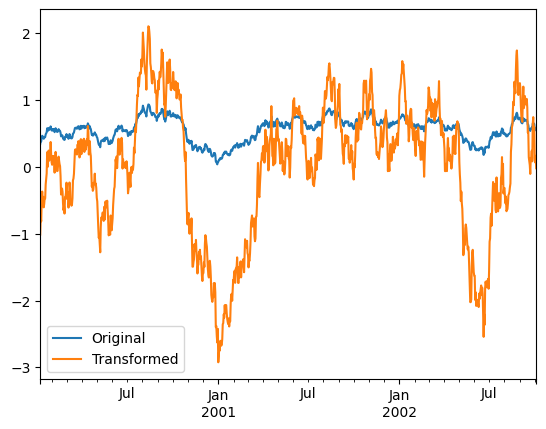

In [ ]:
compare = pd.DataFrame({'Original' : ts, 'Transformed' : transformed})
compare.plot()

In [ ]:
sf = pd.Series([1, 1, 2, 3, 3, 3])
sf.groupby(sf).filter(lambda x: x.sum() > 2)  # 요소별로 그룹화했을 때 합계의 결과가 2보다 큰가?

3    3
4    3
5    3
dtype: int64

In [ ]:
df = pd.DataFrame({'key' : ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data' : range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [ ]:
df.groupby('key').sum()  # A, B, C 그룹으로 묶고 덧셈

,data
key,
A,3
B,5
C,7


In [ ]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [ ]:
planets.head()
planets.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [ ]:
planets.groupby('method')['orbital_period'].median()  # method 열을 기준으로 그룹화 후, 각 그룹에서 orbital_period의 중위수 계산 (orbital period : 공전주기)

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [ ]:
# 문제
# 각 그룹의 개수 확인
planets.groupby('method')['method'].count()

method
Astrometry                         2
Eclipse Timing Variations          9
Imaging                           38
Microlensing                      23
Orbital Brightness Modulation      3
Pulsar Timing                      5
Pulsation Timing Variations        1
Radial Velocity                  553
Transit                          397
Transit Timing Variations          4
Name: method, dtype: int64

In [ ]:
for (method, group) in planets.groupby('method'):
  print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [ ]:
planets.groupby('method')['year'].describe().unstack()  # unstack() : 인덱스별로 컬럼 올리기 (모든 데이터에 대해 일괄 처리)

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

In [ ]:
# 문제 : 반별로 최소값, 중위수, 최대값 구하기
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['1반', '2반', '3반', '1반', '2반', '3반'],
                   '국어': rng.randint(80, 100, 6),
                   '수학': rng.randint(90, 100, 6)},
                  columns = ['key', '국어', '수학'])
df

,key,국어,수학
0,1반,92,99
1,2반,95,93
2,3반,80,95
3,1반,83,92
4,2반,83,94
5,3반,87,97


In [ ]:
df.groupby('key').min()
df.groupby('key').median()
df.groupby('key').max()

,국어,수학
key,,
1반,92,99
2반,95,94
3반,87,97


In [ ]:
# 집계함수 (한꺼번에 처리가 가능)
# numpy 함수는 np를 명시해주어야 함
df.groupby('key').aggregate([min, np.median, max])  # 리스트에 함수의 이름을 전달한다 / aggregate() : 함수를 호출

국어             수학           
    min median max min median max
key                              
1반   83   87.5  92  92   95.5  99
2반   83   89.0  95  93   93.5  94
3반   80   83.5  87  95   96.0  97

In [ ]:
# 키 데이터 형식 (국어의 최소값과 수학의 최대값)
df.groupby('key').aggregate({'국어': 'min',
                            '수학': 'max'})

,국어,수학
key,,
1반,83,99
2반,83,94
3반,80,97


In [ ]:
# 문제
# 수학의 표준편차가 1보다 큰 데이터만 출력
def filter_func(x):
  return x['수학'].std() > 1
df.groupby('key').filter(filter_func)

,key,국어,수학
0,1반,92,99
2,3반,80,95
3,1반,83,92
5,3반,87,97


In [ ]:
# 범주형 데이터 (2개: key1, key2)와 연속적 데이터 (2개: data1, data2)
df = pd.DataFrame({'key1' : ['영업부', '영업부', '관리부', '관리부', '영업부'],
                   'key2' : ['남', '여', '남', '여', '남'],
                   'data1' : np.random.randn(5),  # 평균 0, 표준 편차 1인 정규 분포 샘플 5개
                   'data2' : np.random.randn(5)})
print(df)

  key1 key2     data1     data2
0  영업부    남  0.169260  1.133667
1  영업부    여 -0.939921  0.388863
2  관리부    남  1.534230 -0.467013
3  관리부    여 -0.718555  0.304831
4  영업부    남 -0.762602  0.587774


In [ ]:
# 데이터에 열 이름을 붙여 표현한다 / stack() : 데이터 프레임을 재구조화 
print(df.stack())

0  key1          영업부
   key2            남
   data1     0.16926
   data2    1.133667
1  key1          영업부
   key2            여
   data1   -0.939921
   data2    0.388863
2  key1          관리부
   key2            남
   data1     1.53423
   data2   -0.467013
3  key1          관리부
   key2            여
   data1   -0.718555
   data2    0.304831
4  key1          영업부
   key2            남
   data1   -0.762602
   data2    0.587774
dtype: object


In [ ]:
print(df.melt())  # 키를 중심으로 정렬하여 출력 (variable, value 변수)

   variable     value
0      key1       영업부
1      key1       영업부
2      key1       관리부
3      key1       관리부
4      key1       영업부
5      key2         남
6      key2         여
7      key2         남
8      key2         여
9      key2         남
10    data1   0.16926
11    data1 -0.939921
12    data1   1.53423
13    data1 -0.718555
14    data1 -0.762602
15    data2  1.133667
16    data2  0.388863
17    data2 -0.467013
18    data2  0.304831
19    data2  0.587774


In [ ]:
# 문제
# 부서별 평균을 출력
df.groupby(df['key1']).mean()

<ipython-input-58-2b557ccd3310>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['key1']).mean()


,data1,data2
key1,,
관리부,0.407838,-0.081091
영업부,-0.511088,0.703435


In [ ]:
# 성별의 합계
df.groupby(df['key2']).sum()

<ipython-input-60-0646439b7ec9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['key2']).sum()


,data1,data2
key2,,
남,0.940887,1.254429
여,-1.658475,0.693693


In [ ]:
# 부서별로, 성별의 합계를 출력 ['data1']에 대하여
df["data1"].groupby([df['key1'], df['key2']]).sum()
# df.groupby(['key1', 'key2']).sum()['data1']

key1  key2
관리부   남       1.534230
      여      -0.718555
영업부   남      -0.593342
      여      -0.939921
Name: data1, dtype: float64

In [ ]:
# 계층적 인덱스를 행렬로 변환한다. 
result = df["data1"].groupby([df['key1'], df['key2']]).sum()
result.unstack()

key2,남,여
key1,,
관리부,1.534230,-0.718555
영업부,-0.593342,-0.939921


In [ ]:
result2 = result.unstack()
result2.stack()

key1  key2
관리부   남       1.534230
      여      -0.718555
영업부   남      -0.593342
      여      -0.939921
dtype: float64

In [ ]:
states = np.array(['Ohio', 'Califonia', 'Califonia', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
print(df['data1'].groupby([states, years]).mean())

Califonia  2005   -0.939921
           2006    1.534230
Ohio       2005   -0.274647
           2006   -0.762602
Name: data1, dtype: float64


<ipython-input-83-af78ed55a289>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights.groupby(flights['year']).sum().plot.bar()


<Axes: xlabel='year'>

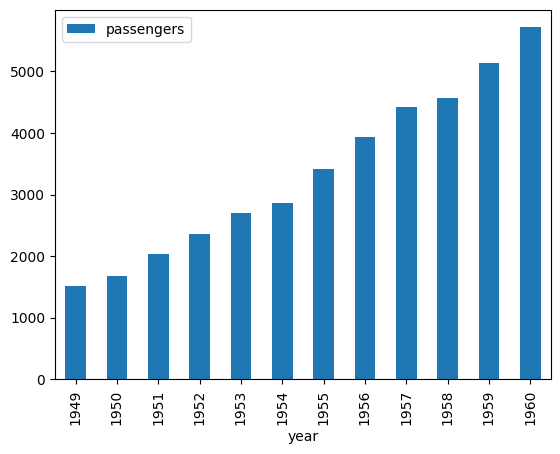

In [ ]:
# 년도별로 그룹화하여 승객의 합계 구하기
flights = sns.load_dataset("flights")
flights.head()
flights.groupby(flights['year']).sum().plot.bar()


<Axes: xlabel='month'>

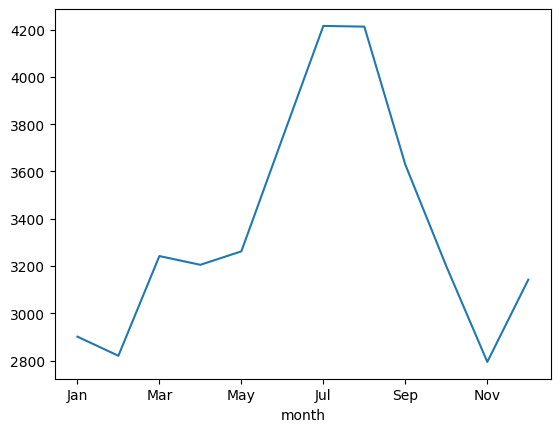

In [ ]:
# 월별로 그룹화하여 승객의 합계 구하기
flights['passengers'].groupby(flights['month']).sum().plot()

In [ ]:
path = '/content/drive/MyDrive/flights.csv'
flights = pd.read_csv(path)
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [ ]:
# 문제
# 항공사(AIRLINE)별 출발지연(DEP_DELAY)에 대한 평균을 출력
print('항공사별', flights['DEP_DELAY'].groupby(flights['AIRLINE']).mean().shape)
print(flights['AIRLINE'].unique())
print(type(flights['DEP_DELAY'].groupby(flights['AIRLINE']).mean()))  # Series
flights['DEP_DELAY'].groupby(flights['AIRLINE']).mean()

항공사별 (14,)
['WN' 'UA' 'MQ' 'AA' 'F9' 'EV' 'OO' 'NK' 'US' 'AS' 'DL' 'VX' 'B6' 'HA']
<class 'pandas.core.series.Series'>


AIRLINE
AA    11.274057
AS     1.808594
B6    14.287823
DL     7.242450
EV     9.092625
F9    14.310398
HA     2.571429
MQ    11.094323
NK    19.514401
OO     9.662279
UA    16.210485
US     4.361355
VX     8.918946
WN    12.639366
Name: DEP_DELAY, dtype: float64

In [ ]:
flights['DEP_DELAY'].groupby(flights['AIRLINE']).mean().values  # 평균값만 출력

array([11.27405714,  1.80859375, 14.28782288,  7.24245006,  9.09262496,
       14.31039755,  2.57142857, 11.09432262, 19.51440054,  9.66227934,
       16.21048534,  4.36135508,  8.9189463 , 12.63936592])

In [ ]:
flights.groupby('AIRLINE').agg({'DEP_DELAY':'mean'})

,DEP_DELAY
AIRLINE,
AA,11.274057
AS,1.808594
B6,14.287823
DL,7.242450
EV,9.092625
F9,14.310398
HA,2.571429
MQ,11.094323
NK,19.514401


In [ ]:
# 문제
# 항공사별로 도착, 출발지연에 대해 평균 시간 구하기
flights.groupby('AIRLINE')[['ARR_DELAY', 'DEP_DELAY']].mean().head()

# 항공사별로 매 주일별로 비행기를 취소('CANCELLED')한 수의 합계 구하기
flights.groupby(['AIRLINE', 'WEEKDAY'])['CANCELLED'].agg('sum').head(7)

AIRLINE  WEEKDAY
AA       1          41
         2           9
         3          16
         4          20
         5          18
         6          21
         7          29
Name: CANCELLED, dtype: int64

In [ ]:
flights.groupby(['AIRLINE', 'WEEKDAY']).agg(
    {'CANCELLED' : ['sum', 'mean'], 'DIVERTED': ['mean']})  # Diverted : 우회

CANCELLED            DIVERTED
                      sum      mean      mean
AIRLINE WEEKDAY                              
AA      1              41  0.032106  0.004699
        2               9  0.007341  0.001631
        3              16  0.011949  0.001494
        4              20  0.015004  0.003751
        5              18  0.014151  0.000786
...                   ...       ...       ...
WN      3              18  0.014118  0.001569
        4              10  0.007911  0.003165
        5               7  0.005828  0.000000
        6              10  0.010132  0.003040
        7               7  0.006066  0.002600

[98 rows x 3 columns]

In [ ]:
df = pd.DataFrame({'A' : ['일반', '일반', '특수', '예외'] * 6,
                   'B' : ['서울', '대구', '부산'] * 8,
                   'C' : ['건조', '건조', '건조', '우기', '우기', '우기'] * 4,
                   'D' : np.random.randn(24),
                   'E' : np.random.randn(24)})
df.head()

,A,B,C,D,E
0,일반,서울,건조,0.096244,-0.467342
1,일반,대구,건조,0.709673,0.059153
2,특수,부산,건조,0.751404,-0.290462
3,예외,서울,우기,-1.412758,1.461060
4,일반,대구,우기,-0.709815,-1.563899


In [ ]:
# 문제
# 3개의 데이터에 대해 범주의 종류를 확인
df.apply(pd.unique)
df.iloc[:, :3].apply(pd.unique)

A    [일반, 특수, 예외]
B    [서울, 대구, 부산]
C        [건조, 우기]
dtype: object

In [ ]:
pd.crosstab(df.A, df.B, margins=True)  # 행렬의 합계 축을 만듬 

B,대구,부산,서울,All
A,,,,
예외,2,2,2,6
일반,4,4,4,12
특수,2,2,2,6
All,8,8,8,24


In [ ]:
pd.crosstab(df.A, df.B, normalize=True)  # 값들을 열들의 합으로 나누어 정규화

B,대구,부산,서울
A,,,
예외,0.083333,0.083333,0.083333
일반,0.166667,0.166667,0.166667
특수,0.083333,0.083333,0.083333


In [ ]:
pd.crosstab([df.A, df.B], df.C, margins=True)

C       건조  우기  All
A   B              
예외  대구   2   0    2
    부산   0   2    2
    서울   0   2    2
일반  대구   2   2    4
    부산   2   2    4
    서울   2   2    4
특수  대구   0   2    2
    부산   2   0    2
    서울   2   0    2
All     12  12   24

In [ ]:
pd.crosstab(df.A, df.B, df.D, aggfunc=np.mean)  # 크로스탭의 내부 매개변수
                                                # 값의 평균

B,대구,부산,서울
A,,,
예외,0.115144,-0.357942,-0.823017
일반,0.045084,-0.370449,0.197475
특수,0.768967,0.720078,-0.487933


In [ ]:
d = {
    'Name':['영구','일구','이구','삼구','사구','오구', '영구','일구','일구','이구','삼구','사구'],
    'Exam':['중간고사','중간고사','중간고사','중간고사','중간고사','중간고사', '기말고사','기말고사','기말고사','기말고사','기말고사','기말고사'],
     
    'Subject':['수학','수학','수학','과학','과학','과학',  '수학','수학','수학','과학','과학','과학'],
    'Result':['Pass','Pass','Fail','Pass','Fail','Pass','Pass','Fail','Fail','Pass','Pass','Fail'],
    'Jumsu' : [ 100,80,50,70.,55,80,100,40,50,100,80,30]
}
df = pd.DataFrame(d, columns=['Name', 'Exam', 'Subject', 'Result', 'Jumsu'])
# 저장하고 로딩
df.to_csv("/content/drive/MyDrive/jumsu.csv", index=False, header=False, encoding="UTF-8")
df = pd.read_csv("/content/drive/MyDrive/jumsu.csv", names=['Name', 'Exam', 'Subject', 'Result', 'Jumsu'])

In [ ]:
df

,Name,Exam,Subject,Result,Jumsu
0,영구,중간고사,수학,Pass,100.0
1,일구,중간고사,수학,Pass,80.0
2,이구,중간고사,수학,Fail,50.0
3,삼구,중간고사,과학,Pass,70.0
4,사구,중간고사,과학,Fail,55.0
5,오구,중간고사,과학,Pass,80.0
6,영구,기말고사,수학,Pass,100.0
7,일구,기말고사,수학,Fail,40.0
8,일구,기말고사,수학,Fail,50.0
9,이구,기말고사,과학,Pass,100.0


In [ ]:
# 문제
# 1) 과목별로 패스 여부를 확인 (도수분포표)
pd.crosstab(df.Subject, df.Result, margins=True)
# df.groupby('Subject')['Result'].count()

Result,Fail,Pass,All
Subject,,,
과학,2,4,6
수학,3,3,6
All,5,7,12


In [ ]:
# 2) 과목별로 대분류하고 시험분별로 소분류된 패스 여부를 카운트 후 합계 출력
pd.crosstab([df.Subject, df.Exam], df.Result, margins=True)
# 비율
# pd.crosstab([df.Subject, df.Exam], df.Result, margins=True, normalize=True)

Result            Fail      Pass   All
Subject Exam                          
과학      기말고사  0.083333  0.166667  0.25
        중간고사  0.083333  0.166667  0.25
수학      기말고사  0.166667  0.083333  0.25
        중간고사  0.083333  0.166667  0.25
All           0.416667  0.583333  1.00

In [ ]:
# 3) 시험별로 패스 여부를 확인
pd.crosstab(df.Exam, df.Result, margins=True)

Result,Fail,Pass,All
Exam,,,
기말고사,3,3,6
중간고사,2,4,6
All,5,7,12


In [ ]:
pd.crosstab(df.Subject, df.Exam, df.Jumsu, aggfunc=np.mean, margins=True)

Exam,기말고사,중간고사,All
Subject,,,
과학,70.000000,68.333333,69.166667
수학,63.333333,76.666667,70.000000
All,66.666667,72.500000,69.583333


In [ ]:
# 피벗(pivot) 테이블 : 데이터를 요약하는 통계표
df = pd.DataFrame({"foo": ['one', 'one-1', 'two', 'two'],
                   "bar": ['A', 'A', 'B', 'C'],
                   "baz": [1, 2, 3, 4]})
df

,foo,bar,baz
0,one,A,1
1,one-1,A,2
2,two,B,3
3,two,C,4


In [ ]:
# 중복되지 않는 데이터에만 생성이 가능하다
# 계층적 인덱스도 불가능하다
df.pivot(index="foo", columns="bar", values="baz")

bar,A,B,C
foo,,,
one,1.0,NaN,NaN
one-1,2.0,NaN,NaN
two,NaN,3.0,4.0


In [ ]:
import pandas as pd

data = {
    "도시": [  "서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"   ],
    "연도": [  "2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"    ],
    "인구": [  9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 2632035  ],
    "지역": [  "수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"    ]
}

df1 = pd.DataFrame(data)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632035,수도권


In [ ]:
df1.pivot("도시", "연도", "인구")  # index, coulmns, values

# df1.pivot("지역", "연도", "인구") => pivot_table
# df1.pivot(index = "도시") => 반드시 행렬로 있어야 한다.

<ipython-input-4-64e97fee0eb4>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df1.pivot("도시", "연도", "인구")  # index, coulmns, values


연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,2632035.0,2890451.0


In [ ]:
path = '/content/drive/MyDrive/sales-funnel.xlsx'
df = pd.read_excel(path)
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [ ]:
df.dtypes

Account      int64
Name        object
Rep         object
Manager     object
Product     object
Quantity     int64
Price        int64
Status      object
dtype: object

In [ ]:
df['Status'].unique()
df['Status'] = df['Status'].astype("category")  # Status의 타입을 카테고리로 바꾸기
df.dtypes

Account        int64
Name          object
Rep           object
Manager       object
Product       object
Quantity       int64
Price          int64
Status      category
dtype: object

In [ ]:
pd.pivot_table(df, index=['Name'])  # 인덱스('Name')만 있어도 만들 수 있다.

<ipython-input-10-dfb3f83e7d52>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(df, index=['Name'])


,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [ ]:
df['Manager'].unique()

array(['Debra Henley', 'Fred Anderson'], dtype=object)

In [ ]:
pd.pivot_table(df, index=['Name'], columns=['Manager'])

<ipython-input-11-00fd78a5bb8d>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(df, index=['Name'], columns=['Manager'])


Account                      Price  \
Manager                      Debra Henley Fred Anderson Debra Henley   
Name                                                                   
Barton LLC                       740150.0           NaN      35000.0   
Fritsch, Russel and Anderson     737550.0           NaN      35000.0   
Herman LLC                            NaN      141962.0          NaN   
Jerde-Hilpert                    412290.0           NaN       5000.0   
Kassulke, Ondricka and Metz           NaN      307599.0          NaN   
Keeling LLC                           NaN      688981.0          NaN   
Kiehn-Spinka                     146832.0           NaN      65000.0   
Koepp Ltd                             NaN      729833.0          NaN   
Kulas Inc                        218895.0           NaN      25000.0   
Purdy-Kunde                           NaN      163416.0          NaN   
Stokes LLC                            NaN      239344.0          NaN   
Trantow-Barrows                  714466.0           NaN      15000.0   

                                               Quantity                
Manager                      Fred Anderson Debra Henley Fred Anderson  
Name                                                                   
Barton LLC                             NaN     1.000000           NaN  
Fritsch, Russel and Anderson           NaN     1.000000           NaN  
Herman LLC                         65000.0          NaN           2.0  
Jerde-Hilpert                          NaN     2.000000           NaN  
Kassulke, Ondricka and Metz         7000.0          NaN           3.0  
Keeling LLC                       100000.0          NaN           5.0  
Kiehn-Spinka                           NaN     2.000000           NaN  
Koepp Ltd                          35000.0          NaN           2.0  
Kulas Inc                              NaN     1.500000           NaN  
Purdy-Kunde                        30000.0          NaN           1.0  
Stokes LLC                          7500.0          NaN           1.0  
Trantow-Barrows                        NaN     1.333333           NaN

In [ ]:
pd.pivot_table(df, index=['Name'], columns=['Manager'], values=['Price'])

Price              
Manager                      Debra Henley Fred Anderson
Name                                                   
Barton LLC                        35000.0           NaN
Fritsch, Russel and Anderson      35000.0           NaN
Herman LLC                            NaN       65000.0
Jerde-Hilpert                      5000.0           NaN
Kassulke, Ondricka and Metz           NaN        7000.0
Keeling LLC                           NaN      100000.0
Kiehn-Spinka                      65000.0           NaN
Koepp Ltd                             NaN       35000.0
Kulas Inc                         25000.0           NaN
Purdy-Kunde                           NaN       30000.0
Stokes LLC                            NaN        7500.0
Trantow-Barrows                   15000.0           NaN

In [ ]:
import numpy as np

pd.pivot_table(df, index=['Manager', 'Rep'], values=['Price'], aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [ ]:
pd.pivot_table(df, index=['Manager', 'Rep'], columns=['Product'], 
               values=['Price', 'Quantity'], aggfunc=[np.mean, len], fill_value = 0, margins=True)  # fill_value : NaN 값들을 특정 값으로 채우기

mean                               \
                                    Price                                
Product                               CPU Maintenance Monitor Software   
Manager       Rep                                                        
Debra Henley  Craig Booker   32500.000000        5000       0    10000   
              Daniel Hilton  52500.000000           0       0    10000   
              John Smith     35000.000000        5000       0        0   
Fred Anderson Cedric Moss    47500.000000        5000       0    10000   
              Wendy Yule     82500.000000        7000    5000        0   
All                          51666.666667        5500    5000    10000   

                                                                         \
                                           Quantity                       
Product                               All       CPU Maintenance Monitor   
Manager       Rep                                                         
Debra Henley  Craig Booker   20000.000000  1.000000           2       0   
              Daniel Hilton  38333.333333  2.000000           0       0   
              John Smith     20000.000000  1.000000           2       0   
Fred Anderson Cedric Moss    27500.000000  1.500000           1       0   
              Wendy Yule     44250.000000  3.500000           3       2   
All                          30705.882353  1.888889           2       2   

                                                 len                      \
                                               Price                       
Product                     Software       All   CPU Maintenance Monitor   
Manager       Rep                                                          
Debra Henley  Craig Booker         1  1.250000     2           1       0   
              Daniel Hilton        1  1.666667     2           0       0   
              John Smith           0  1.500000     1           1       0   
Fred Anderson Cedric Moss          1  1.250000     2           1       0   
              Wendy Yule           0  3.000000     2           1       1   
All                                1  1.764706     9           4       1   

                                                                       \
                                         Quantity                       
Product                     Software All      CPU Maintenance Monitor   
Manager       Rep                                                       
Debra Henley  Craig Booker         1   4        2           1       0   
              Daniel Hilton        1   3        2           0       0   
              John Smith           0   2        1           1       0   
Fred Anderson Cedric Moss          1   4        2           1       0   
              Wendy Yule           0   4        2           1       1   
All                                3  17        9           4       1   

                                          
                                          
Product                     Software All  
Manager       Rep                         
Debra Henley  Craig Booker         1   4  
              Daniel Hilton        1   3  
              John Smith           0   2  
Fred Anderson Cedric Moss          1   4  
              Wendy Yule           0   4  
All                                3  17

In [ ]:
pd.pivot_table(df, index=['Manager', 'Status'], columns=['Product'], 
               values=['Price', 'Quantity'], aggfunc={'Quantity':len, 'Price':[np.sum, np.mean]}, fill_value=0)

Price                                       \
                          mean                                  sum   
Product                    CPU Maintenance Monitor Software     CPU   
Manager       Status                                                  
Debra Henley  declined   35000           0       0        0   70000   
              pending    40000        5000       0        0   40000   
              presented  30000           0       0    10000   30000   
              won        65000           0       0        0   65000   
Fred Anderson declined   65000           0       0        0   65000   
              pending        0        5000       0        0       0   
              presented  30000           0    5000    10000   30000   
              won        82500        7000       0        0  165000   

                                                     Quantity              \
                                                          len               
Product                 Maintenance Monitor Software      CPU Maintenance   
Manager       Status                                                        
Debra Henley  declined            0       0        0        2           0   
              pending         10000       0        0        1           2   
              presented           0       0    20000        1           0   
              won                 0       0        0        1           0   
Fred Anderson declined            0       0        0        1           0   
              pending          5000       0        0        0           1   
              presented           0    5000    10000        1           0   
              won              7000       0        0        2           1   

                                          
                                          
Product                 Monitor Software  
Manager       Status                      
Debra Henley  declined        0        0  
              pending         0        0  
              presented       0        2  
              won             0        0  
Fred Anderson declined        0        0  
              pending         0        0  
              presented       1        1  
              won             0        0

In [ ]:
table = pd.pivot_table(df, index=['Manager', 'Status'], columns=['Product'], 
               values=['Price', 'Quantity'], aggfunc={'Quantity':len, 'Price':[np.sum, np.mean]}, fill_value=0)
table

Price                                       \
                          mean                                  sum   
Product                    CPU Maintenance Monitor Software     CPU   
Manager       Status                                                  
Debra Henley  declined   35000           0       0        0   70000   
              pending    40000        5000       0        0   40000   
              presented  30000           0       0    10000   30000   
              won        65000           0       0        0   65000   
Fred Anderson declined   65000           0       0        0   65000   
              pending        0        5000       0        0       0   
              presented  30000           0    5000    10000   30000   
              won        82500        7000       0        0  165000   

                                                     Quantity              \
                                                          len               
Product                 Maintenance Monitor Software      CPU Maintenance   
Manager       Status                                                        
Debra Henley  declined            0       0        0        2           0   
              pending         10000       0        0        1           2   
              presented           0       0    20000        1           0   
              won                 0       0        0        1           0   
Fred Anderson declined            0       0        0        1           0   
              pending          5000       0        0        0           1   
              presented           0    5000    10000        1           0   
              won              7000       0        0        2           1   

                                          
                                          
Product                 Monitor Software  
Manager       Status                      
Debra Henley  declined        0        0  
              pending         0        0  
              presented       0        2  
              won             0        0  
Fred Anderson declined        0        0  
              pending         0        0  
              presented       1        1  
              won             0        0

In [ ]:
# 테이블에 쿼리를 부여할 수 있음
table.query('Manager == ["Debra Henley"]')

Price                                       \
                             mean                                  sum   
Product                       CPU Maintenance Monitor Software     CPU   
Manager      Rep                                                         
Debra Henley Craig Booker   32500        5000       0    10000   65000   
             Daniel Hilton  52500           0       0    10000  105000   
             John Smith     35000        5000       0        0   35000   

                                                        Quantity              \
                                                             len               
Product                    Maintenance Monitor Software      CPU Maintenance   
Manager      Rep                                                               
Debra Henley Craig Booker         5000       0    10000        2           1   
             Daniel Hilton           0       0    10000        2           0   
             John Smith           5000       0        0        1           1   

                                             
                                             
Product                    Monitor Software  
Manager      Rep                             
Debra Henley Craig Booker        0        1  
             Daniel Hilton       0        1  
             John Smith          0        0

In [ ]:
table.query('Status == ["pending", "won"]')

Price                                                   \
                        mean                                  sum               
Product                  CPU Maintenance Monitor Software     CPU Maintenance   
Manager       Status                                                            
Debra Henley  pending  40000        5000       0        0   40000       10000   
              won      65000           0       0        0   65000           0   
Fred Anderson pending      0        5000       0        0       0        5000   
              won      82500        7000       0        0  165000        7000   

                                       Quantity                               
                                            len                               
Product               Monitor Software      CPU Maintenance Monitor Software  
Manager       Status                                                          
Debra Henley  pending       0        0        1           2       0        0  
              won           0        0        1           0       0        0  
Fred Anderson pending       0        0        0           1       0        0  
              won           0        0        2           1       0        0

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [ ]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [ ]:
# 문제
# 1) 남녀간에 담배 피는 경우와 팁과 관련이 있는지 확인 
tips.groupby(['sex', 'smoker'])[['tip']].agg(lambda x: x.max() - x.min())
tips.groupby(['sex', 'smoker'])[['tip']].agg(lambda x: x.mean())
def range_tips(x):
  return x.max() - x.min()
tips.groupby(['sex', 'smoker'])[['tip']].agg(range_tips)
tips.groupby(['sex', 'smoker']).agg(['mean', range_tips])

<ipython-input-59-4afa3f7c9be2>:8: FutureWarning: ['day', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  tips.groupby(['sex', 'smoker']).agg(['mean', range_tips])


total_bill                  tip                 size           
                    mean range_tips      mean range_tips      mean range_tips
sex    smoker                                                                
Male   Yes     22.284500      43.56  3.051167       9.00  2.500000          4
       No      19.791237      40.82  3.113402       7.75  2.711340          4
Female Yes     17.977879      41.23  2.931515       5.50  2.242424          3
       No      18.105185      28.58  2.773519       4.20  2.592593          5

In [ ]:
# 2) 팁의 비율이 요일과 점심/저녁여부, 인원수에 따라 어떤 영향을 받는지 확인  (day, time, size, tip)
tips.pivot_table(index=['day', 'time'], columns=['size'], values='tip',
                 margins=True, fill_value=0)

size              1         2         3         4         5      6       All
day  time                                                                   
Thur Lunch   1.8300  2.430638  2.692500  4.218000  5.000000  5.300  2.767705
     Dinner  0.0000  3.000000  0.000000  0.000000  0.000000  0.000  3.000000
Fri  Lunch   1.9200  2.352000  3.000000  0.000000  0.000000  0.000  2.382857
     Dinner  0.0000  2.777273  0.000000  4.730000  0.000000  0.000  2.940000
Sat  Dinner  1.0000  2.517547  3.797778  4.123846  3.000000  0.000  2.993103
Sun  Dinner  0.0000  2.816923  3.120667  4.087778  4.046667  5.000  3.255132
All          1.4375  2.582308  3.393158  4.135405  4.028000  5.225  2.998279

In [ ]:
# 데이터 크롤링
# 웹 데이터 -> 서버(server) -> 웹 브라우저에서 확인한다.
# 네트워크 담당 + HTML 파싱하는 역할
# urllib3을 기반으로 하는 requests + HTML을 파싱하는 BeautifulSoup
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re

In [ ]:
class HTMLParser:  # 한 페이지에 여러개의 테이블
  def parse_url(self, url):
    response = requests.get(url)  # HTML 페이지를 가지고 있는 response 객체
    soup = BeautifulSoup(response.text, "html.parser")  # text에는 웹 페이지 내용이 들어있음 / html.parser를 이용하여 response.text를 파싱 / 웹브라우저와 메모리 내용이 일치
    return [(table('id'), self.parse_html_table(table))  # 테이블 데이터를 가지고 옴
               for table in soup.find_all('table')]  # 객체를 태그(tag)나 클래스, id, name 등으로 찾는다 / 한 페이지에 여러개의 테이블이 있다면, 테이블 형태로 가져옴
  
  def parse_html_table(self, table):  # 테이블 정보가 반복되어 호출되기에, 따로 함수로 정의
    n_columns = 0  # 열(column) 수
    n_rows = 0     # 행(row) 수
    column_names = []  # 열의 이름
    # 행 수와 열 수, 열 이름을 결정
    for row in table.find_all('tr'):  # 행 수를 확인
      td_tags = row.find_all('td')    # 열 수를 확인
      # print(row)
      if len(td_tags) > 0:  # 데이터가 있을 때
        n_rows += 1  # 하나의 행을 추가
        if n_columns == 0:  # 열이 초기화되지 않았을 때
          n_columns = len(td_tags)  # 열 수를 태그에 넣기
      th_tags = row.find_all('th')  # th : 열의 이름
      if len(th_tags) > 0 and len(column_names) == 0:  # 열 이름이 정해지지 않았을 때
        for th in th_tags:
          column_names.append(th.get_text())  # get_text() 추가

    # 열 수하고 열 이름이 맞지 않을 때
    if len(th_tags) > 0 and len(column_names) != n_columns:
      raise Exception("컬럼 타이틀이 컬럼 숫자와 불일치")
    # 열 이름이 없다면, 숫자로 된 이름을 생성
    columns = column_names if len(column_names) > 0 else range(0, n_columns)
    df = pd.DataFrame(columns = columns, index = range(0, n_rows))  # 빈 데이터 프레임이 생성
    row_marker = 0


    for row in table.find_all('tr'):
        column_marker = 0
        columns = row.find_all('td')
        for column in columns:
            re_text = column.get_text().replace('\n', '')
            re_text = re_text.replace('\t', '')
            re_text = re_text.replace('\r', '')
            df.iloc[row_marker, column_marker] = re_text
            column_marker += 1
        if len(columns) > 0:
            row_marker += 1
    for col in df:
        try:
            df[col] = df[col].astype(float) # 숫자변경 : 문자열 숫자로 변경
        except ValueError:
            pass
    return df

In [ ]:
url = 'https://www.w3schools.com/html/tryit.asp?filename=tryhtml_table_intro'
print(url)
hp = HTMLParser()
table = hp.parse_url(url)[0][1]
table

https://www.w3schools.com/html/tryit.asp?filename=tryhtml_table_intro


,Company,Contact,Country
0,Alfreds Futterkiste,Maria Anders,Germany
1,Centro comercial Moctezuma,Francisco Chang,Mexico
2,Ernst Handel,Roland Mendel,Austria
3,Island Trading,Helen Bennett,UK
4,Laughing Bacchus Winecellars,Yoshi Tannamuri,Canada
5,Magazzini Alimentari Riuniti,Giovanni Rovelli,Italy


In [ ]:
path = 'https://www.w3schools.com/html/html_tables.asp'
print(url)
hp = HTMLParser()
table = hp.parse_url(url)[0][1]
table

https://www.w3schools.com/html/tryit.asp?filename=tryhtml_table_intro


,Company,Contact,Country
0,Alfreds Futterkiste,Maria Anders,Germany
1,Centro comercial Moctezuma,Francisco Chang,Mexico
2,Ernst Handel,Roland Mendel,Austria
3,Island Trading,Helen Bennett,UK
4,Laughing Bacchus Winecellars,Yoshi Tannamuri,Canada
5,Magazzini Alimentari Riuniti,Giovanni Rovelli,Italy


In [ ]:
# 문제
date = '2021.04.02'
url_part1 = """http://dart.fss.or.kr/dsac001/search.ax?selectDate="""
url_part2 = """&sort=&sorteds=&mdayCnt&currentPage="""
url = url_part1 + date + url_part2
print(url)
hp = HTMLParser()
table = hp.parse_url(url)[0][1]
table
# 필요없이 등장하는 조판기호를 제거하도록 위 클래스를 수정

http://dart.fss.or.kr/dsac001/search.ax?selectDate=2021.04.02&sort=&sorteds=&mdayCnt&currentPage=


,시간,공시대상회사,보고서명,제출인,접수일자,비고
0,18:26,코일월지엠엘,주권매매거래정지기간변경 (개선기간 부여),코스닥시장본부,2021.04.02,코
1,18:26,코일월지엠엘,기타시장안내 (상장폐지관련 이의신청서 접수 및 개선기간 부여),코스닥시장본부,2021.04.02,코
2,17:59,기매직마이크로,[기재정정]주요사항보고서(유상증자결정),매직마이크로,2021.04.02,정
3,17:59,기엔에이치에프제15호공공임대위탁관리부동산투자회사,감사보고서 (2020.12),한일회계법인,2021.04.02,
4,17:58,기현일개발,감사보고서 (2020.12),동원회계법인,2021.04.02,
...,...,...,...,...,...,...
95,17:31,기흥아포밍,감사보고서 (2020.12),회계법인상지원,2021.04.02,
96,17:31,기수창건설,감사보고서 (2020.12),동원회계법인,2021.04.02,
97,17:31,기광덕종합목재,감사보고서 (2020.12),삼지회계법인,2021.04.02,
98,17:30,기화성,감사보고서 (2020.12),삼덕회계법인,2021.04.02,


In [ ]:
path = '/content/drive/MyDrive/services.csv'
complaints = pd.read_csv(path)
print(complaints.head(2))

<ipython-input-85-b25a76492a9d>:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints = pd.read_csv(path)


   Unique Key            Created Date Closed Date Agency  \
0    26589651  10/31/2013 02:08:41 AM         NaN   NYPD   
1    26593698  10/31/2013 02:01:04 AM         NaN   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type Incident Zip  \
0                  Loud Talking  Street/Sidewalk      11432.0   
1  Commercial Overnight Parking  Street/Sidewalk      11378.0   

   Incident Address  ... Bridge Highway Name Bridge Highway Direction  \
0  90-03 169 STREET  ...                 NaN                      NaN   
1         58 AVENUE  ...                 NaN                      NaN   

  Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction  \
0       NaN                    NaN             NaN             NaN   
1       NaN                    NaN             NaN             NaN   

  

In [86]:
complaints.describe()

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
count,1.110690e+05,9.814300e+04,98143.000000,0.0,98143.000000,98143.000000
mean,2.651565e+07,1.004544e+06,205553.153287,NaN,40.730821,-73.926738
std,4.694558e+04,2.206087e+04,31334.677543,NaN,0.086006,0.079563
min,2.642588e+07,9.134950e+05,121152.000000,NaN,40.498949,-74.254437
25%,2.647433e+07,9.920490e+05,182506.000000,NaN,40.667529,-73.971882
50%,2.651472e+07,1.003205e+06,203251.000000,NaN,40.724521,-73.931580
75%,2.655684e+07,1.016823e+06,233366.000000,NaN,40.807183,-73.882430
max,2.659613e+07,1.067024e+06,271485.000000,NaN,40.911792,-73.701278


In [88]:
complaints.shape  # 111069x52

(111069, 52)

In [92]:
# 열 이름을 확인
complaints.columns  # 어떠한 열들이 있는지 전체 출력

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [93]:
complaints['Complaint Type'].unique().shape  # Complaint Type 열의 데이터 개수

(165,)

In [94]:
complaints['Borough'].unique().shape

(6,)